In [ ]:
'''
1.XGBoost compared to other models
2.Model parameter adjustment
3.Cross-validate and report results
4.Get XGBoost results for all trains
'''

In [ ]:
# Import the required packages

In [ ]:
import pandas as pd 
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall,roc_auc_score as auc
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
from xgboost import plot_importance
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Since this is running on Google's colab, you need to import the appropriate packages. 
# Here are the changes to suit the situation
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['installbackupandsync.exe',
 'sample_submission.csv',
 'test_clean_kalman.csv',
 'train_clean_kalman.csv',
 'open-data-fin.csv',
 'Colab Notebooks',
 'Andrew_tensorflow_leeson',
 'newtrain.csv',
 'newtrain2.csv',
 'newtrain3.csv',
 'datawithpr_withtrainid.csv',
 'datawithpr_havepr.csv',
 'datapr1.0.csv',
 'datapr_planC.csv',
 'planC_with_state.csv',
 'full_data_with_state.csv',
 'T1K11_2.csv',
 'save',
 'Model',
 'LSTM',
 'lstm_model.h5',
 'new_clear_data.csv',
 'pdfullindex.csv',
 'datawithstate.csv',
 '120000_pd_pr_train_id.csv',
 '150000_pd_pr_train_id.csv',
 '180000_pd_pr_train_id.csv',
 '210000_pd_pr_train_id.csv',
 '240000_pd_pr_train_id.csv',
 '270000_pd_pr_train_id.csv',
 '300000_pd_pr_train_id.csv',
 'pd_full_pr_train_id.csv',
 'newderby_datawithca0.csv',
 'lstm_fullpred_model.h5',
 'new_testdata_with_ca.csv',
 'full_testdata_with_ca_state.csv',
 'open-data-2-derby.csv',
 '1M00_softmax.h5',
 '1S41_simpleRNN.h5',
 'lstm_fullpred_model_vs.h5',
 'simpleRNN_fullpred_model_vs.h5']

In [ ]:
!pip install tensorflow_addons
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Input, Dense, Add, Multiply
import pandas as pd
import numpy as np
import random
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras import losses, models, optimizers
import tensorflow_addons as tfa
import gc

from sklearn.model_selection import GroupKFold
from sklearn.metrics import f1_score


In [ ]:
#read data from dataset
data = pd.read_csv('full_data_with_state.csv',index_col= 0)
data

,Timestamp,Type,ID,Event2,State,Panel_Request,From_Berth,To_Berth,Train_ID,SDY544,SDY551,SDY552,SDY555,SDY556,SDY557,SDY559,SDY562,SDY564,SDY569,SDY571,SDY572,SDY574,SDY581,SDY583,STD5027,STD5029,STD5030,STD5032,STD5033,STD5035,STD5036,STD5037,STD5038,STD5039,STD5040,STD5043,STD5044,STD5045,STD5046,STD5049,...,SDW5302,SDW5304,SDW5306,SDW5308,SDW5309,SDW5310,SDW5311,SDW5313,SDW5315,SDW5316,SDW5318,SDW5319,SDW5321,SDW5322,SDW5324,SDW5328,SDW5329,SDW5330,SDW5331,SDW5332,SDW5333,SEC5474,SEC5475,SEC5477,SEC5480,SEC5481,SEC5483,SEC5484,SEC5486,SEC5487,SEC5488,SEC5489,SEC5490,SEC5491,SEC5493,SEC5496,SEC5501,SEC5502,SEC5503,SEC5504
1,18/10/2019 10:42,Signal,STD5053,STD5053,0,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18/10/2019 10:42,CA,B5313,CAB5053B5313,1K11,NaN,B5053,B5313,1K11,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,18/10/2019 10:42,CA,B0556,CAB0554B0556,1F20,NaN,B0554,B0556,1F20,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,18/10/2019 10:42,Route,RDC5065C(M),RDC5065C(M),0,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,18/10/2019 10:42,Signal,STD5032,STD5032,1,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991449,08/11/2019 13:31,Panel Request,RDW5306A(C),RDW5306A(C),1,NaN,NaN,NaN,NaN,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
991453,08/11/2019 13:31,Signal,STD5029,STD5029,0,NaN,NaN,NaN,NaN,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
991455,08/11/2019 13:31,CA,B5033,CAB5029B5033,1V10,QRTD5045B-2(M),B5029,B5033,1V10,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
991456,08/11/2019 13:31,Panel Request,RTD5045B-2(M),RTD5045B-2(M),1,NaN,NaN,NaN,NaN,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''
1.XGBoost compared to other models
'''

In [ ]:
# Take out the ID with route
def get_ID_withroute(ID_data):
    new_ID=[]
    for i in ID_data:
        if i[0]=='B':
            new_ID.append(i[1:5])
        elif i[0:3]=='RDY' :
            new_ID.append('0'+i[3:])
        elif i[0]=='R':
            new_ID.append(i[3:])
        elif i[0:3]=='SDY':
            new_ID.append('0'+i[3:6])
        elif i[0]=='S':
            new_ID.append(i[3:7])
    return new_ID

# Take out the ID
def get_ID(ID_data):
    new_ID_2=[]
    for i in ID_data:
            if i[0]=='B':
                new_ID_2.append(i[1:5])
            elif i[0:3]=='RDY' :
                new_ID_2.append('0'+i[3:6])
            elif i[0]=='R':
                new_ID_2.append(i[3:7])
            elif i[0:3]=='SDY':
                new_ID_2.append('0'+i[3:6])
            elif i[0]=='S':
                new_ID_2.append(i[3:7])
    return new_ID_2

# Find out what kinds of panel requests there are
def get_unique_pr_with0(train_ID,data):
    train1=data[data['Train_ID']==train_ID]
    new_ID=get_ID_withroute(train1['ID'].tolist()) 

    type1= train1['Type'].tolist()
    pr_type=[]

    for i in range(0,len(type1)):
        if type1[i]=='Panel Request':
            pr_type.append(new_ID[i])
        else:
            pr_type.append(0)

    pr_unique=[]
    for j in pr_type:
        if (j != 0)and (j not in pr_unique):
            pr_unique.append(j)


    return pr_unique,pr_type

In [ ]:
# Define a function to get test data for a train
def get_train_message(train_ID,data):
    train1=data[data['Train_ID']==train_ID]
    train1['Timestamp']=range(1,len(train1)+1)
    
    
    new_ID_2=get_ID(train1['ID'].tolist())
    train1['ID']=new_ID_2 
    train1.drop(['State','Panel_Request','From_Berth','To_Berth'],inplace=True,axis=1)  
    pr_unique,pr_type=get_unique_pr_with0(train_ID,data)
    pr_type_list=[]
    for i in pr_type:
        if i in pr_unique:
            pr_type_list.append(pr_unique.index(i)+1)
        else:
            pr_type_list.append(0)
        
    train1.drop(['Event2'],inplace=True,axis=1)
    train1['Type']=pr_type_list
    train1.index=range(1,len(train1)+1)
    
    
    #One-hot encoding of Signal ID
    from sklearn.preprocessing import OneHotEncoder
    X = train1.iloc[:,[2]]
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    signalid=[]
    for i in enc.get_feature_names():
        signalid.append(i[3:])
    result = pd.DataFrame(result)
    result.index=range(1,len(result)+1)
    result.columns = signalid
    train1 = pd.concat([train1,result],axis=1)   
    
    train1.drop(['ID','Timestamp'],inplace=True,axis=1)


    #One-hot encoding of train ID
    X = train1.iloc[:,[1]]
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    signalid=[]
    for i in enc.get_feature_names():
        signalid.append(i[3:])
    result = pd.DataFrame(result)
    result.index=range(1,len(result)+1)
    result.columns = signalid
    train1 = pd.concat([train1,result],axis=1)  

    train1.drop(['Train_ID'],inplace=True,axis=1)
    
    return train1

In [ ]:
# 1S41 train as an example to get test data
train_message=get_train_message('1S41',data)
train_message

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Type,SDY544,SDY551,SDY552,SDY555,SDY556,SDY557,SDY559,SDY562,SDY564,SDY569,SDY571,SDY572,SDY574,SDY581,SDY583,STD5027,STD5029,STD5030,STD5032,STD5033,STD5035,STD5036,STD5037,STD5038,STD5039,STD5040,STD5043,STD5044,STD5045,STD5046,STD5049,STD5053,STD5054,STD5055,STD5056,SDC5061,SDC5062,SDC5063,SDC5064,...,SEC5483,SEC5484,SEC5486,SEC5487,SEC5488,SEC5489,SEC5490,SEC5491,SEC5493,SEC5496,SEC5501,SEC5502,SEC5503,SEC5504,0544,0552,0554,0556,0564,0574,0584,0586,5061,5075,5083,5093,5101,5109,5111,5300,5316,5324,5328,5330,5332,B305,C833,DMLS,X061,1S41
1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1568,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1569,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1570,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Get test and training sets

In [ ]:
data1=train_message.copy()
data1=data1[data1['Type']!=0]

In [ ]:
X = data1.iloc[:,data1.columns != "Type"]
y = data1.iloc[:,data1.columns == "Type"]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=240)
# Fix the index of test and training sets
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [ ]:
#XGBoost

In [ ]:
clf = XGBC().fit(Xtrain, Ytrain)
ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

0.9615384615384616
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
 

In [ ]:
#SVM(ovo)

In [ ]:
from sklearn.svm import SVC
clf = SVC().fit(Xtrain, Ytrain)
SVC(decision_function_shape='ovo', kernel='rbf')
ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

0.9834710743801653
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.80      0.89         5
           3       0.00      0.00      0.00         1
           4       0.88      1.00      0.94        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6

    accuracy                           0.98       121
   macro avg       0.90      0.89      0.89       121
weighted avg       0.98      0.98      0.98       121

0.8461538461538461
              precision    recall  f1-score   support

           1       0.62      1.00      0.77         5
           2       0.00      0.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVM(ovr)

In [ ]:
from sklearn.svm import SVC
clf = SVC().fit(Xtrain, Ytrain)
SVC(decision_function_shape='ovr', kernel='rbf')
ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

0.9834710743801653
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.80      0.89         5
           3       0.00      0.00      0.00         1
           4       0.88      1.00      0.94        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6

    accuracy                           0.98       121
   macro avg       0.90      0.89      0.89       121
weighted avg       0.98      0.98      0.98       121

0.8461538461538461
              precision    recall  f1-score   support

           1       0.62      1.00      0.77         5
           2       0.00      0.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=240).fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

0.9038461538461539
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.25      1.00      0.40         1
 

In [ ]:
#naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         6

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

0.8076923076923077
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         1
 

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4).fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

0.7851239669421488
              precision    recall  f1-score   support

           1       0.53      1.00      0.69        17
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         1
           4       0.65      0.87      0.74        15
           5       1.00      0.75      0.86        16
           6       0.83      0.71      0.77        14
           7       1.00      0.60      0.75        15
           8       1.00      0.56      0.71         9
           9       0.90      0.82      0.86        11
          10       1.00      0.92      0.96        12
          11       1.00      0.67      0.80         6

    accuracy                           0.79       121
   macro avg       0.80      0.72      0.73       121
weighted avg       0.85      0.79      0.79       121

0.6923076923076923
              precision    recall  f1-score   support

           1       0.36      1.00      0.53         5
           2       0.25      1.00      0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Here's a test. Test if direct predictions are made for all data using various models. 
#That is, without separating out the train data individually

In [ ]:
#Find all trains with more than 400 lines of train data.

In [ ]:
def cal_train_number(data):
    tid=data['Train_ID'].unique().tolist()
    tid.remove(np.nan)
    tid_withlen=[]
    each=[]
    for i in tid:
        each=[i,len(data[data['Train_ID']==i])]
        tid_withlen.append(each)
   
    def takeSecond(elem):
        return elem[1]
    
    tid_withlen.sort(key=takeSecond,reverse=True)
    
    return tid_withlen

ctn = cal_train_number(data)
train_idlist=[]
for i in ctn:
    if i[1]>400:
        train_idlist.append(i[0])
train_idlist

In [ ]:
# Same prep as above

In [ ]:
def get_ID_withroute(ID_data):
    new_ID=[]
    for i in ID_data:
        if i[0]=='B':
            new_ID.append(i[1:5])
        elif i[0:3]=='RDY' :
            new_ID.append('0'+i[3:])
        elif i[0]=='R':
            new_ID.append(i[3:])
        elif i[0:3]=='SDY':
            new_ID.append('0'+i[3:6])
        elif i[0]=='S':
            new_ID.append(i[3:7])
    return new_ID

In [ ]:
def get_unique_pr_with0(train_ID,data):
    train1=data[data['Train_ID'].isin(train_ID)]
    new_ID=get_ID_withroute(train1['ID'].tolist()) 

    type1= train1['Type'].tolist()
    pr_type=[]

    for i in range(0,len(type1)):
        if type1[i]=='Panel Request':
              pr_type.append(new_ID[i])
        else:
              pr_type.append(0)

    pr_unique=[]
    for j in pr_type:
        if (j != 0)and (j not in pr_unique):
              pr_unique.append(j)
    return pr_unique,pr_type
  

def get_train_message(train_ID,data):
    train1=data[data['Train_ID'].isin(train_ID)]
    train1['Timestamp']=range(1,len(train1)+1)
    
    
    new_ID_2=get_ID(train1['ID'].tolist())
    train1['ID']=new_ID_2
    
    
    train1.drop(['State','Panel_Request','From_Berth','To_Berth'],inplace=True,axis=1)
    
    pr_unique,pr_type=get_unique_pr_with0(train_ID,data)

    pr_type_list=[]
    for i in pr_type:
        if i in pr_unique:
            pr_type_list.append(pr_unique.index(i)+1)
        else:
            pr_type_list.append(0)
        
    train1.drop(['Event2'],inplace=True,axis=1)
    train1['Type']=pr_type_list
    train1.index=range(1,len(train1)+1)
    
    
    from sklearn.preprocessing import OneHotEncoder
    
    X = train1.iloc[:,[2]]
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    signalid=[]
    for i in enc.get_feature_names():
        signalid.append(i[3:])
    result = pd.DataFrame(result)
    result.index=range(1,len(result)+1)
    result.columns = signalid
    train1 = pd.concat([train1,result],axis=1)   
    
    train1.drop(['ID','Timestamp'],inplace=True,axis=1)


    
    X = train1.iloc[:,[1]]
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    signalid=[]
    for i in enc.get_feature_names():
        signalid.append(i[3:])
    result = pd.DataFrame(result)
    result.index=range(1,len(result)+1)
    result.columns = signalid
    train1 = pd.concat([train1,result],axis=1)  

    train1.drop(['Train_ID'],inplace=True,axis=1)
    
    return train1

In [ ]:
#Getting all the trains together as test data

train_message=get_train_message(train_idlist,data)
data1=train_message.copy()
data1=data1[data1['Type']!=0]
X = data1.iloc[:,data1.columns != "Type"]
y = data1.iloc[:,data1.columns == "Type"]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=513)
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4).fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7309339766628921
              precision    recall  f1-score   support

           1       0.54      0.99      0.70       433
           2       0.60      0.99      0.74       995
           3       0.52      0.81      0.64       402
           4       0.69      0.78      0.73       419
           5       0.59      0.83      0.69       407
           6       0.68      0.82      0.74       407
           7       0.72      0.89      0.80       122
           8       0.60      0.76      0.67       547
           9       0.72      0.96      0.82       963
          10       0.77      0.91      0.84       610
          11       0.41      0.59      0.48       150
          12       0.76      0.82      0.79       489
          13       0.62      0.87      0.72       597
          14       0.74      0.81      0.77       908
          15       0.85      0.80      0.83      1039
          16       0.65      0.81      0.72       553
          17       0.75      0.67      0.71       345
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5543940264215967
              precision    recall  f1-score   support

           1       0.34      0.90      0.50       160
           2       0.45      0.88      0.59       409
           3       0.30      0.51      0.38       177
           4       0.47      0.62      0.54       161
           5       0.42      0.62      0.50       175
           6       0.46      0.70      0.56       175
           7       0.61      0.80      0.69        45
           8       0.39      0.56      0.46       238
           9       0.62      0.93      0.74       406
          10       0.61      0.81      0.70       252
          11       0.17      0.22      0.19        68
          12       0.59      0.71      0.64       212
          13       0.45      0.65      0.53       236
          14       0.59      0.66      0.62       427
          15       0.75      0.71      0.73       463
          16       0.49      0.60      0.54       234
          17       0.53      0.52      0.53       125
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.947023780217616
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       433
           2       1.00      0.93      0.96       995
           3       1.00      0.94      0.97       402
           4       1.00      1.00      1.00       419
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       407
           7       1.00      0.78      0.88       122
           8       1.00      0.92      0.96       547
           9       1.00      1.00      1.00       963
          10       1.00      1.00      1.00       610
          11       0.31      0.23      0.26       150
          12       1.00      0.99      0.99       489
          13       1.00      1.00      1.00       597
          14       1.00      1.00      1.00       908
          15       1.00      1.00      1.00      1039
          16       1.00      0.70      0.82       553
          17       1.00      0.58      0.74       345
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#random forest

In [ ]:
clf = RandomForestClassifier(random_state=240).fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9999015311899956
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00       995
           3       1.00      1.00      1.00       402
           4       1.00      1.00      1.00       419
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       407
           7       1.00      1.00      1.00       122
           8       1.00      1.00      1.00       547
           9       1.00      1.00      1.00       963
          10       1.00      1.00      1.00       610
          11       1.00      1.00      1.00       150
          12       1.00      1.00      1.00       489
          13       1.00      1.00      1.00       597
          14       1.00      1.00      1.00       908
          15       1.00      1.00      1.00      1039
          16       1.00      1.00      1.00       553
          17       1.00      1.00      1.00       345
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#svm

In [ ]:
from sklearn.svm import SVC
clf = SVC().fit(Xtrain, Ytrain)
SVC(decision_function_shape='ovo', kernel='rbf')
ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.92600068928167
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       433
           2       0.98      1.00      0.99       995
           3       0.92      0.93      0.92       402
           4       0.99      1.00      1.00       419
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       407
           7       0.92      1.00      0.96       122
           8       0.91      0.97      0.93       547
           9       1.00      1.00      1.00       963
          10       0.98      1.00      0.99       610
          11       0.84      0.14      0.24       150
          12       0.86      1.00      0.92       489
          13       0.99      1.00      1.00       597
          14       1.00      1.00      1.00       908
          15       1.00      1.00      1.00      1039
          16       0.80      0.99      0.88       553
          17       0.63      1.00      0.77       345
          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9018954623779437
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       160
           2       0.96      1.00      0.98       409
           3       0.90      0.88      0.89       177
           4       1.00      1.00      1.00       161
           5       0.99      1.00      1.00       175
           6       0.99      1.00      1.00       175
           7       1.00      1.00      1.00        45
           8       0.89      0.94      0.91       238
           9       1.00      1.00      1.00       406
          10       0.98      1.00      0.99       252
          11       0.56      0.07      0.13        68
          12       0.88      1.00      0.94       212
          13       0.99      1.00      1.00       236
          14       1.00      1.00      1.00       427
          15       1.00      1.00      1.00       463
          16       0.69      0.99      0.81       234
          17       0.52      1.00      0.69       125
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#xgboost

In [ ]:
clf = XGBC().fit(Xtrain, Ytrain)
ypred = clf.predict(Xtrain)
print(clf.score(Xtrain,Ytrain))
print(classification_report(Ytrain, ypred,target_names=None))

ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

In [ ]:
'''
2.Model parameter adjustment
'''

In [ ]:
#The tests above have established that XGBoost should be chosen as the model.
# Parameter adjustment of XGBoost using train 1S41 as an example

In [ ]:
train_message=get_train_message('1S41',data)
data1=train_message.copy()
data1=data1[data1['Type']!=0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
X = data1.iloc[:,data1.columns != "Type"]
y = data1.iloc[:,data1.columns == "Type"]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=240)

for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [ ]:
clf = XGBC().fit(Xtrain, Ytrain)
ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9615384615384616
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.88      1.00      0.93         7
           7       1.00      1.00      1.00         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         6

    accuracy                           0.96        52
   macro avg       0.97      0.95      0.96        52
weighted avg       0.97      0.96      0.96        52



In [ ]:
#XGBoost

xgb = XGBC(max_depth=3, 
      learning_rate=0.1, 
      n_estimators=100,
      objective='multi:softmax', 
      booster='gbtree', 
      gamma=0,
      subsample=0.8,
      )
clf = xgb.fit(Xtrain, Ytrain)
ypred2 = clf.predict(Xtest)
print(clf.score(Xtest,Ytest))
print(classification_report(Ytest, ypred2,target_names=None))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9807692307692307
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.50      1.00      0.67         1
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         6

    accuracy                           0.98        52
   macro avg       0.95      0.98      0.96        52
weighted avg       0.99      0.98      0.98        52



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgb = XGBC(max_depth=3, 
      learning_rate=0.1, 
      n_estimators=100,
      objective='multi:softmax', 
      booster='gbtree', 
      gamma=0,
      subsample=0.8,
      )
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xgb, X, y, cv=kfold, scoring='precision_macro')
print("Precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(xgb, X, y, cv=kfold, scoring='recall_macro')
print("Recall: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(xgb, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(xgb, X, y, cv=kfold, scoring='f1_macro')
print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 100.00% (0.00%)
Recall: 100.00% (0.00%)
Accuracy: 100.00% (0.00%)
F1: 100.00% (0.00%)


In [ ]:
'''
3.Cross-validate and report results
'''

In [ ]:
#report  cross-validation

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

SVC(decision_function_shape='ovo', kernel='rbf')
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(SVC(), X, y, cv=kfold, scoring='precision_macro')
print("Precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(SVC(), X, y, cv=kfold, scoring='recall_macro')
print("Recall: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(SVC(), X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(SVC(), X, y, cv=kfold, scoring='f1_macro')
print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
knc = KNeighborsClassifier(n_neighbors=4)
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(knc, X, y, cv=kfold, scoring='precision_macro')
print("Precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(knc, X, y, cv=kfold, scoring='recall_macro')
print("Recall: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(knc, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(knc, X, y, cv=kfold, scoring='f1_macro')
print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
gnb = GaussianNB()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(gnb, X, y, cv=kfold, scoring='precision_macro')
print("Precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(gnb, X, y, cv=kfold, scoring='recall_macro')
print("Recall: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(gnb, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(gnb, X, y, cv=kfold, scoring='f1_macro')
print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
rfc = RandomForestClassifier(random_state=240)
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(rfc, X, y, cv=kfold, scoring='precision_macro')
print("Precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(rfc, X, y, cv=kfold, scoring='recall_macro')
print("Recall: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(rfc, X, y, cv=kfold, scoring='f1_macro')
print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [ ]:
xgb = XGBC()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xgb, X, y, cv=kfold, scoring='precision_macro')
print("Precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(xgb, X, y, cv=kfold, scoring='recall_macro')
print("Recall: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(xgb, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
results = cross_val_score(xgb, X, y, cv=kfold, scoring='f1_macro')
print("F1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision: 100.00% (0.00%)
Recall: 100.00% (0.00%)
Accuracy: 100.00% (0.00%)
F1: 100.00% (0.00%)


In [ ]:
# Cross-validated average for all vehicles

In [ ]:
def get_cvs_result(train_ID,data):
    
    train_message=get_train_message(train_ID,data)
    data1=train_message.copy()
    data1=data1[data1['Type']!=0]
    X = data1.iloc[:,data1.columns != "Type"]
    y = data1.iloc[:,data1.columns == "Type"]




    svc_=[]

    SVC(decision_function_shape='ovo', kernel='rbf')
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(SVC(), X, y, cv=kfold, scoring='precision_macro')
    svc_.append(results.mean())
    results = cross_val_score(SVC(), X, y, cv=kfold, scoring='recall_macro')
    svc_.append(results.mean())
    results = cross_val_score(SVC(), X, y, cv=kfold, scoring='accuracy')
    svc_.append(results.mean())
    results = cross_val_score(SVC(), X, y, cv=kfold, scoring='f1_macro')
    svc_.append(results.mean())

    knc_=[]
    knc = KNeighborsClassifier(n_neighbors=4)
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(knc, X, y, cv=kfold, scoring='precision_macro')
    knc_.append(results.mean())
    results = cross_val_score(knc, X, y, cv=kfold, scoring='recall_macro')
    knc_.append(results.mean())
    results = cross_val_score(knc, X, y, cv=kfold, scoring='accuracy')
    knc_.append(results.mean())
    results = cross_val_score(knc, X, y, cv=kfold, scoring='f1_macro')
    knc_.append(results.mean())

    gnb_=[]
    gnb = GaussianNB()
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(gnb, X, y, cv=kfold, scoring='precision_macro')
    gnb_.append(results.mean())
    results = cross_val_score(gnb, X, y, cv=kfold, scoring='recall_macro')
    gnb_.append(results.mean())
    results = cross_val_score(gnb, X, y, cv=kfold, scoring='accuracy')
    gnb_.append(results.mean())
    results = cross_val_score(gnb, X, y, cv=kfold, scoring='f1_macro')
    gnb_.append(results.mean())

    rfc_=[]
    rfc = RandomForestClassifier(random_state=240)
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(rfc, X, y, cv=kfold, scoring='precision_macro')
    rfc_.append(results.mean())
    results = cross_val_score(rfc, X, y, cv=kfold, scoring='recall_macro')
    rfc_.append(results.mean())
    results = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')
    rfc_.append(results.mean())
    results = cross_val_score(rfc, X, y, cv=kfold, scoring='f1_macro')
    rfc_.append(results.mean())

    xgb_=[]
    xgb = XGBC()
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='precision_macro')
    xgb_.append(results.mean())
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='recall_macro')
    xgb_.append(results.mean())
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='accuracy')
    xgb_.append(results.mean())
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='f1_macro')
    xgb_.append(results.mean())

    result=[svc_,knc_,gnb_,rfc_,xgb_]

    return result

In [ ]:
result= get_cvs_result('1S41',data)
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

[[0.8506734006734007,
  0.8760942760942761,
  0.9016339869281046,
  0.851919191919192],
 [0.8592655723905723,
  0.8219486531986533,
  0.827124183006536,
  0.811118326118326],
 [0.8317234848484848,
  0.8509890572390573,
  0.8830065359477125,
  0.8277128427128426],
 [0.9833333333333334,
  0.9863636363636363,
  0.988562091503268,
  0.983030303030303],
 [1.0, 1.0, 1.0, 1.0]]

In [ ]:
all_cvs_result=[]
for i in train_idlist[:50]: 
    result= get_cvs_result(i,data)
    all_cvs_result.append(result)
all_cvs_result

流式输出内容被截断，只能显示最后 5000 行内容。
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

[[[0.7441674297924298,
   0.7875457875457875,
   0.8359683794466403,
   0.7514743589743589],
  [0.6765934065934065,
   0.7078441697191697,
   0.7351778656126482,
   0.6675731074481075],
  [0.799557387057387,
   0.8020718864468865,
   0.850197628458498,
   0.789880080237223],
  [0.8811630036630037,
   0.885169413919414,
   0.9379446640316205,
   0.8796260683760684],
  [0.9211492673992673,
   0.9139697802197801,
   0.9606719367588934,
   0.9163629426129425]],
 [[0.8506734006734007,
   0.8760942760942761,
   0.9016339869281046,
   0.851919191919192],
  [0.8592655723905723,
   0.8219486531986533,
   0.827124183006536,
   0.811118326118326],
  [0.8317234848484848,
   0.8509890572390573,
   0.8830065359477125,
   0.8277128427128426],
  [0.9833333333333334,
   0.9863636363636363,
   0.988562091503268,
   0.983030303030303],
  [1.0, 1.0, 1.0, 1.0]],
 [[0.8537782587782587,
   0.8871139971139972,
   0.9297385620915033,
   0.8650500927643785],
  [0.8129466433037862,
   0.7890019240019239,
   0.79

In [ ]:
# Calculate the average accuracy of all

In [ ]:
svmpsum=0
svmrsum=0
svmasum=0
svmfsum=0

kncpsum=0
kncrsum=0
kncasum=0
kncfsum=0

gnbpsum=0
gnbrsum=0
gnbasum=0
gnbfsum=0

rfpsum=0
rfrsum=0
rfasum=0
rffsum=0

xgbpsum=0
xgbrsum=0
xgbasum=0
xgbfsum=0

for i in all_cvs_result:
    svmpsum=svmpsum+i[0][0]
    svmrsum=svmrsum+i[0][1]
    svmasum=svmasum+i[0][2]
    svmfsum=svmfsum+i[0][3]

    kncpsum=kncpsum+i[1][0]
    kncrsum=kncrsum+i[1][1]
    kncasum=kncasum+i[1][2]
    kncfsum=kncfsum+i[1][3]

    gnbpsum=gnbpsum+i[2][0]
    gnbrsum=gnbrsum+i[2][1]
    gnbasum=gnbasum+i[2][2]
    gnbfsum=gnbfsum+i[2][3]

    rfpsum=rfpsum+i[3][0]
    rfrsum=rfrsum+i[3][1]
    rfasum=rfasum+i[3][2]
    rffsum=rffsum+i[3][3]

    xgbpsum=xgbpsum+i[4][0]
    xgbrsum=xgbrsum+i[4][1]
    xgbasum=xgbasum+i[4][2]
    xgbfsum=xgbfsum+i[4][3]


svmpsum=svmpsum/50
svmrsum=svmrsum/50
svmasum=svmasum/50
svmfsum=svmfsum/50

kncpsum=kncpsum/50
kncrsum=kncrsum/50
kncasum=kncasum/50
kncfsum=kncfsum/50

gnbpsum=gnbpsum/50
gnbrsum=gnbrsum/50
gnbasum=gnbasum/50
gnbfsum=gnbfsum/50

rfpsum=rfpsum/50
rfrsum=rfrsum/50
rfasum=rfasum/50
rffsum=rffsum/50

xgbpsum=xgbpsum/50
xgbrsum=xgbrsum/50
xgbasum=xgbasum/50
xgbfsum=xgbfsum/50

svmr=[svmpsum,svmrsum,svmasum,svmfsum]
kncr=[kncpsum,kncrsum,kncasum,kncfsum]
gnbr=[gnbpsum,gnbrsum,gnbasum,gnbfsum]
rfcr=[rfpsum,rfrsum,rfasum,rffsum]
xgbr=[xgbpsum,xgbrsum,xgbasum,xgbfsum]

svmr,kncr,gnbr,rfcr,xgbr

([0.8269604094870273,
  0.863033794990413,
  0.8856223626331043,
  0.8333967696410342],
 [0.6906980950616454,
  0.7037155665413017,
  0.7170765175219777,
  0.6661204536895045],
 [0.8715903496715416,
  0.8871338226058427,
  0.9027064179142823,
  0.8673513355083172],
 [0.9571413111670465,
  0.9649104713097363,
  0.9750025494610532,
  0.9588020023767085],
 [0.9722133465390818,
  0.975932212232212,
  0.9846306171450031,
  0.9731118361921302])

In [ ]:
all_cvs_result[0][0][1]

0.7875457875457875

In [ ]:
# Calculate the average of all accuracy rates after adjusting parameters

In [ ]:
def get_cvs_result_xgb_para(train_ID,data):
    train_message=get_train_message(train_ID,data)
    data1=train_message.copy()
    data1=data1[data1['Type']!=0]
    X = data1.iloc[:,data1.columns != "Type"]
    y = data1.iloc[:,data1.columns == "Type"]

    xgb_=[]
    xgb = XGBC(max_depth=3, 
      learning_rate=0.1, 
      n_estimators=100,
      objective='multi:softmax', 
      booster='gbtree', 
      gamma=0,
      subsample=0.8,
      )
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='precision_macro')
    xgb_.append(results.mean())
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='recall_macro')
    xgb_.append(results.mean())
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='accuracy')
    xgb_.append(results.mean())
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='f1_macro')
    xgb_.append(results.mean())


    return xgb_

In [ ]:
allxgb_=[]
for i in train_idlist[:50]: 
    xgb_= get_cvs_result_xgb_para(i,data)
    allxgb_.append(xgb_)
allxgb_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

[[0.9002838827838827,
  0.8995627289377289,
  0.9515810276679841,
  0.8966086691086691],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.9969696969696968, 0.9954545454545455, 0.99375, 0.9951515151515151],
 [1.0, 1.0, 1.0, 1.0],
 [0.9969696969696968, 0.9954545454545455, 0.99375, 0.9951515151515151],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.8849387254901961,
  0.9031617647058823,
  0.9354761904761905,
  0.8910130718954248],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.9851851851851852,
  0.9888888888888889,
  0.9933333333333334,
  0.9866666666666667],
 [1.0, 1.0, 1.0, 1.0],
 [0.985, 0.99, 0.9933333333333334, 0.9866666666666667],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.9969696969696968, 0.9954545454545455, 0.99375, 0.9951515151515151],
 [1.0, 1.0, 1.0, 1.0],
 [0.9425757575757576,
  0.9536363636363637,
  0.9733333333333334,
  0.9457575757575757],
 [0.946060606060606,
  0.9527272727272728,
  0.9741666666666667,
  0.9477

In [ ]:
xgbpsump=0
xgbrsump=0
xgbasump=0
xgbfsump=0

for i in allxgb_:
    xgbpsump=xgbpsump+i[0]
    xgbrsump=xgbrsump+i[1]
    xgbasump=xgbasump+i[2]
    xgbfsump=xgbfsump+i[3]

xgbpsump=xgbpsump/50
xgbrsump=xgbrsump/50
xgbasump=xgbasump/50
xgbfsump=xgbfsump/50


xgbrp=[xgbpsump,xgbrsump,xgbasump,xgbfsump]
xgbrp

[0.9726708404068701,
 0.9761610943794767,
 0.9848273703917563,
 0.9735346300322769]

In [ ]:
# Visualize the change of parameters before and after

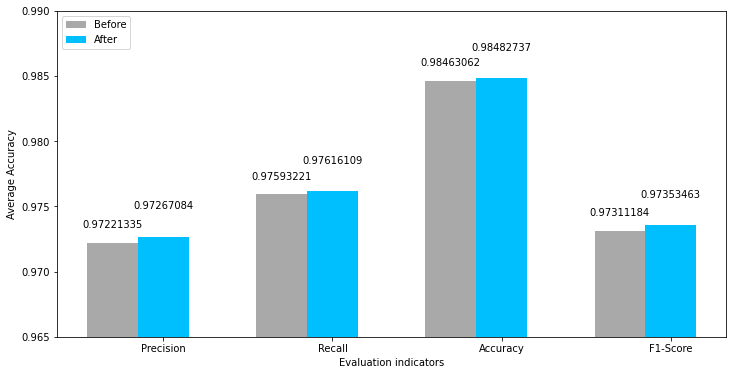

In [142]:
import matplotlib.pyplot as plt
import numpy as np
size = 2
plt.figure(figsize=(12, 6))
y1=[xgbr[0],xgbr[1],xgbr[2],xgbr[3]]
y2=[xgbrp[0],xgbrp[1],xgbrp[2],xgbrp[3]]

y1 = np.array(y1)
y2 = np.array(y2)

name = ["Precision","Recall","Accuracy","F1-Score",]
x = np.arange(len(name))
width = 0.3

plt.bar(x, y1,  width=width, label='Before',color='darkgrey', lw=3)
plt.bar(x + width, y2, width=width, label='After', color='deepskyblue', tick_label=name, lw=3)


for a, b in zip(x,y1):
    plt.text(a, b+0.001, '%.8f' % b, ha='center', va='bottom')
for a,b in zip(x,y2):
    plt.text(a+width, b+0.002, '%.8f' %b, ha='center', va='bottom')

plt.xticks()
plt.ylim([0.965,0.99])
plt.legend(loc="upper left")  # 防止label和图像重合显示不出来
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.ylabel('Average Accuracy')
plt.xlabel('Evaluation indicators')

#plt.rcParams['figure.figsize'] = (12.0, 8.0)  # 尺寸

plt.show()

In [144]:
allxgb_

[[0.9002838827838827,
  0.8995627289377289,
  0.9515810276679841,
  0.8966086691086691],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.9969696969696968, 0.9954545454545455, 0.99375, 0.9951515151515151],
 [1.0, 1.0, 1.0, 1.0],
 [0.9969696969696968, 0.9954545454545455, 0.99375, 0.9951515151515151],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.8849387254901961,
  0.9031617647058823,
  0.9354761904761905,
  0.8910130718954248],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.9851851851851852,
  0.9888888888888889,
  0.9933333333333334,
  0.9866666666666667],
 [1.0, 1.0, 1.0, 1.0],
 [0.985, 0.99, 0.9933333333333334, 0.9866666666666667],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [0.9969696969696968, 0.9954545454545455, 0.99375, 0.9951515151515151],
 [1.0, 1.0, 1.0, 1.0],
 [0.9425757575757576,
  0.9536363636363637,
  0.9733333333333334,
  0.9457575757575757],
 [0.946060606060606,
  0.9527272727272728,
  0.9741666666666667,
  0.9477

In [ ]:
'''
4.Get XGBoost results for all trains
'''

In [ ]:
#Get XGBoost results for all trains 

In [148]:
def get_xgb_result(train_ID,data):
    train_message=get_train_message(train_ID,data)
    data1=train_message.copy()
    data1=data1[data1['Type']!=0]
    X = data1.iloc[:,data1.columns != "Type"]
    y = data1.iloc[:,data1.columns == "Type"]
    xgb_=[]
    xgb = XGBC(max_depth=3, 
      learning_rate=0.1, 
      n_estimators=100,
      objective='multi:softmax', 
      booster='gbtree', 
      gamma=0,
      subsample=0.8,
      )
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(xgb, X, y, cv=kfold, scoring='recall_macro')
    xgb_ = [i,results.mean()]
    return xgb_

In [149]:
all_xgb_acc=[]
for i in train_idlist: 
    xgb_= get_xgb_result(i,data)
    all_xgb_acc.append(xgb_)
all_xgb_acc


流式输出内容被截断，只能显示最后 5000 行内容。
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/d

[['1M00', 0.8995627289377289],
 ['1S41', 1.0],
 ['1S43', 1.0],
 ['1S53', 1.0],
 ['1E63', 0.9954545454545455],
 ['1S49', 1.0],
 ['1E64', 0.9954545454545455],
 ['1S51', 1.0],
 ['1S47', 1.0],
 ['5F17', 0.9031617647058823],
 ['1S37', 1.0],
 ['1E44', 1.0],
 ['1E40', 1.0],
 ['1C62', 0.9888888888888889],
 ['1E48', 1.0],
 ['1F25', 0.99],
 ['1E36', 1.0],
 ['1S39', 1.0],
 ['1E60', 0.9954545454545455],
 ['1E67', 1.0],
 ['1F02', 0.9536363636363637],
 ['1F05', 0.9527272727272728],
 ['1E73', 0.96],
 ['1F10', 1.0],
 ['1F15', 1.0],
 ['1F75', 0.9495959595959595],
 ['1S31', 0.9846153846153847],
 ['1F20', 1.0],
 ['1S33', 1.0],
 ['1F22', 0.9727272727272727],
 ['1F65', 0.9284848484848484],
 ['1F63', 0.8747979797979799],
 ['1F70', 0.8968181818181817],
 ['1F40', 0.95],
 ['1F45', 0.99],
 ['1F55', 1.0],
 ['1F60', 0.9336363636363636],
 ['1F57', 0.9888888888888889],
 ['1V54', 1.0],
 ['1V62', 1.0],
 ['1V52', 1.0],
 ['1F47', 1.0],
 ['1F37', 0.9615384615384615],
 ['1F35', 0.9888888888888889],
 ['1F27', 0.9818181818

In [150]:
pdall_xgb_acc=pd.DataFrame(all_xgb_acc)
pdall_xgb_acc.to_csv(r"all_xgb_acc.csv")

In [155]:
sum=0
for i in all_xgb_acc[:260]:
    sum=sum+i[1]

sum/260

0.885612800645182